<a href="https://colab.research.google.com/github/althafnewdelhi/CE888_DataScience/blob/master/Lab2/Lab2_Bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bootstrapping in Python

### 1. The bootstrap:

In [0]:
#Import Libraries.
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Load the data.
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
data

array([ 2.,  8., 20., 13.,  5.,  9., 10.,  8., 22., 10.,  2.,  4.,  7.,
        9.])

In [10]:
#Create Array
np.random.choice (data, size = len(data))

array([10.,  9., 13.,  8.,  8.,  2.,  7.,  9., 10.,  9.,  2.,  8.,  7.,
       10.])

In [0]:
def boostrap_mean(sample, sample_size, n_iterations):
  bs_sample=np.random.choice(sample,size=(n_iterations,sample_size),replace=True)
  row_mean=np.mean(bs_sample,axis=1)
  data_mean=np.mean(row_mean)
  lower=np.percentile(row_mean,5)
  upper=np.percentile(row_mean,95)
  return data_mean, lower, upper

In [0]:
def boostrap_mean_ci(sample, sample_size, n_iterations,ci):
  bs_sample=np.random.choice(sample,size=(n_iterations,sample_size),replace=True)
  row_mean=np.mean(bs_sample,axis=1)
  data_mean=np.mean(row_mean)
  lower=np.percentile(row_mean,(100-ci)/2)
  upper=np.percentile(row_mean,100-((100-ci)/2))
  return data_mean, lower, upper

(0, 100000)

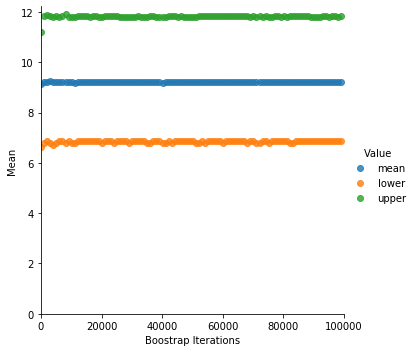

In [14]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')

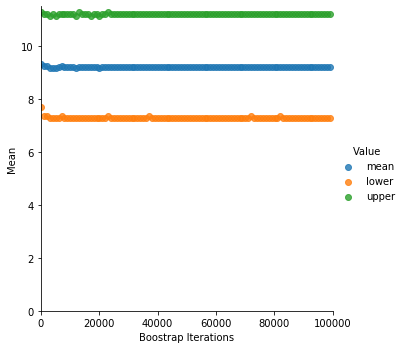

In [16]:
boots = []
for i in range(100, 100000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


### 2. Data visualisation:

In [17]:
df= pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0
...,...,...
244,27,NaN
245,27,NaN
246,32,NaN
247,28,NaN


In [18]:
df.columns

Index(['Current fleet', 'New Fleet'], dtype='object')

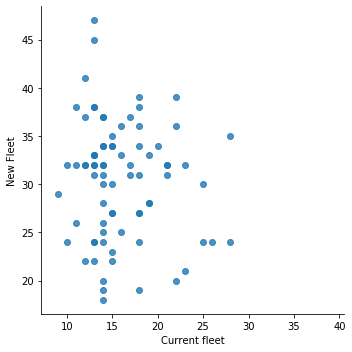

In [19]:
data=df[df.columns[1]].values
sns.lmplot(df.columns[0],df.columns[1],data=df,fit_reg=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac75e1f048>,
      dtype=object)

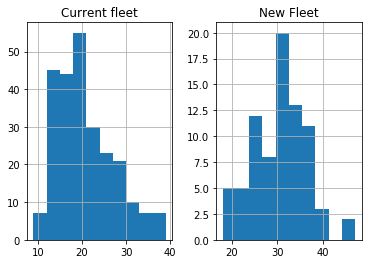

In [21]:
df.hist()

In [0]:
df[['Current fleet']].mean(axis=0)
df[['New Fleet']].mean(axis=0)
current=df[df.columns[0]]
new=df[df.columns[1]][:79]

In [25]:
m,l,u=boostrap_mean(current, len(current), 1000)
print(m)
print(l)

20.140899598393574
19.49759036144578


In [26]:
a,b,c=boostrap_mean(new, len(new), 1000)
print(a)
print(b)
diff_obs=a-m
print(diff_obs)
ctr=0

30.51167088607595
29.40506329113924
10.370771287682377


In [27]:
for i in range(10000):
  concat=np.concatenate((current,new))
  permut=np.random.permutation(concat)
  pold = permut[:249]
  pnew = permut[249:]
  #print(pold,pnew)
  #print('')
  pold1,b,c=boostrap_mean(pold, len(pold), 1)
  pnew1,d,e=boostrap_mean(pnew, len(pnew), 1)
  #print(pold1,pnew1)
  #print(pnew1,pold1)
  diff_perm=pnew1-pold1
  #print(diff_perm)
  if(diff_perm>diff_obs):
    ctr=ctr+1

print(ctr/10000)

0.0
